# Proyecto EDA (EXPLORATORY DATA ANALYSIS)
# Análisis del cine del género cinematográfico

# Introducción

El presente proyecto se centra en el análisis del cine de género drama y terror, con un enfoque particular en el cine de terror en lengua española. Surge de la inquietud por comprender las razones detrás de la escasa producción de películas de terror en este idioma. Esta situación podría estar influenciada por una serie de factores, como la historia de la producción cinematográfica, la demanda del mercado, la existencia de estereotipos, tabúes y estigmas culturales, así como la falta de promoción y el interés del público. Además, la influencia del idioma en la escritura de guiones podría desempeñar un papel crucial en la forma en que se desarrollan las historias y los personajes. 
El lenguaje no solo afecta la construcción de diálogos, sino que también impacta en el uso de metáforas y en la creación de atmósferas que son esenciales para el género del terror. Por lo tanto, planteamos la hipótesis de que la lengua en la que se redacta el guion de una película podría influir significativamente en su clasificación dentro del género cinematográfico. ¿Hasta qué punto el idioma en el que se elabora el guion afecta la percepción y la recepción del género de terror en el cine hispanohablante? Esta pregunta nos guiará en el desarrollo de nuestro análisis.

Para ello hemos tomado como referencia una muestra de datos de Kaggle.
- Fuente: https://www.kaggle.com/datasets/akashguna/netflix-prize-shows-information?resource=download

# Hipótesis
La hipótesis se puede resumir de la siguiente manera: 
¿La lengua en la que se redacta el guion de una película influye significativamente en su clasificación dentro del género cinematográfico, afectando la percepción y la recepción del género de terror en el cine hispanohablante?
Esta hipótesis se basa en la idea de que factores como la historia de la producción cinematográfica, estereotipos culturales, tabúes, la promoción y el interés del público, así como el impacto del idioma en la narrativa, pueden contribuir a la escasa producción de películas de terror en lengua española.

# 1. Importación de paquetes
En esta sección, se llevará a cabo la importación de los paquetes esenciales para llevar a cabo el Análisis Exploratorio de Datos (EDA). Estos paquetes son:

In [2]:
# Importando los paquetes
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

# 2. Carga de datos
En esta sección, procederemos a cargar el conjunto de datos y a examinar su contenido. Este paso es fundamental para comprender la estructura, las características y la calidad de la información que vamos a utilizar en nuestro análisis. A través de esta revisión inicial, podremos identificar posibles anomalías, valores faltantes y la distribución de los datos, lo que nos permitirá definir mejor los pasos siguientes en nuestro proceso de análisis.

In [3]:
# Cargando el dataset que está en la ruta "./data/imdb.csv"
df_imdb = pd.read_csv('../data/imdb.csv')

In [ ]:
# Mostrando las primeras filas del DataFrame con el método 'head()'
df_imdb.head()

# 3. Limpieza de datos
La limpieza de datos es un paso esencial en el proceso de análisis, ya que garantiza la calidad y la integridad de la información. En esta fase, nos enfocaremos en abordar diversos problemas, como la gestión de valores nulos y la corrección de errores en el formato.

Hemos identificado que algunas columnas relevantes (como genre, country, language, cast, director, composer y writer) contienen datos que están rodeados de corchetes y comillas simples. Para resolver esto, crearemos una función que se encargue de limpiar estas columnas y genere un nuevo DataFrame depurado.

Modificación de Columnas:
- **Eliminación de caracteres no deseados**: Utilizaremos el método str.replace() para eliminar las comillas simples y los corchetes de los datos en las columnas seleccionadas. Esto nos permitirá obtener un formato más limpio y uniforme.

- **Eliminación de espacios en blanco**: Aplicaremos la función str.strip() para eliminar cualquier espacio en blanco que pueda existir al inicio o al final de los valores. Esto es crucial para evitar errores en análisis posteriores.

- **Uso de expresiones regulares**: Incorporaremos el argumento regex=True en nuestras operaciones de búsqueda y reemplazo. Esto nos permitirá utilizar expresiones regulares para identificar y eliminar de forma más eficiente los caracteres no deseados (corchetes y comillas simples) en todas las columnas del DataFrame.

A través de estos pasos, aseguraremos que nuestros datos estén en un formato óptimo para realizar análisis más profundos y precisos.

In [8]:
# Definiendo una función para limpiar las columnas
def clean_column(column):
    return column.str.replace(r"[\[\]']", '', regex=True).str.strip()

In [9]:
# Limpiando las columnas específicas
columns_to_clean = ['genre', 'country', 'language', 'cast', 'director', 'composer', 'writer']
for column in columns_to_clean:
    df_imdb[column] = clean_column(df_imdb[column])

In [10]:
# Verificando los cambios
df_imdb[columns_to_clean].head()

genre        country  language  \
0  Documentary, Animation, Family  United States   English   
1         Crime, Horror, Thriller          Japan  Japanese   
2                          Family  United States   English   
3                     Documentary  United States       NaN   
4                        Thriller  United States       NaN   

                                                cast       director  \
0                    Christian Slater, Scott Sampson            NaN   
1  Masaki Suda, Fukase, Mitsuki Takahata, Shidô N...    Akira Nagai   
2  Paula Abdul, Aurorah Allain, Bill Bohl, Bob Ga...  Steve Purcell   
3                                                NaN            NaN   
4  Marc Menchaca, Gideon Adlon, Dylan Sprayberry,...     John Hyams   

       composer                                             writer  
0           NaN           Mike Carrol, Mike Carroll, Georgann Kane  
1  Youki Kojima  Takashi Nagasaki, Takashi Nagasaki, Anna Kawahara  
2           NaN                                                NaN  
3           NaN                                                NaN  
4           NaN                    Katelyn Crabb, Kevin Williamson

In [ ]:
# Mostrando las primeras filas del DataFrame limpio de comillas simples y corchetes
df_imdb.head()

In [ ]:
# Vamos a renombrar la columna Unnamed ya que este viene a ser el 'titleId' de la película según el dataset inicial
df_imdb.rename(columns={'Unnamed: 0':'titleId'}, inplace=True) 
df_imdb.head()

In [14]:
# Vamos a guardar el DataFrame limpio en un nuevo archivo csv
df_imdb.to_csv('../data/df_imdb_cleaned.csv', index=False)

# 4. Tratamiento de las películas por género

## 4.1. Películas del género Horror (terror)
En esta sección, hemos filtrado los datos para centrarnos exclusivamente en las películas del género de terror. Hemos cargado un nuevo DataFrame que ha sido depurado, eliminando comillas simples y corchetes, lo que nos permitirá trabajar de manera más eficiente. A continuación, procederemos a revisar la presencia de valores nulos y realizaremos otras acciones necesarias para asegurar la integridad y calidad de los datos.

In [7]:
# Cargando el dataset que está en la ruta "./data/imdb.csv"
df_imdb_2 = pd.read_csv('../data/df_imdb_cleaned.csv')


In [8]:
# Utilizamos el metodo '.loc()' para acceder al grupo de filas 'movie'y 'tv movie' de la columna 'kind'
movies = df_imdb_2.loc[df_imdb_2['kind'].isin(['movie', 'tv movie'])]

Ahora tenemos que pulir el DataFrame accediendo a las columnas
- Utilizaremos el método '.loc()' para filtrar las filas donde la columna genre que contienen 'Horror' o 'horror'. La función str.lower() se utiliza para convertir todos los valores a minúsculas, asegurando que se capturen ambos casos.
- Seleccionaremos del DataFrame las columnas a ser trabajadas ('titleId', 'title', 'kind', 'genre', 'country', 'language')
- Analizaremos los nulos y daremos solución a ellos, utilizando el método '.fillna()' para reemplazar los valores nulos de la columna 'language' con el valor correspondiente de la columna 'country' en la misma fila.
- Creamos un DataFrame que muestre el número de películas por horror por país. Utilizamos los métodos: método 'value_counts()' para contar la cantidad de películas por cada país, y el método 'reset_index()' para convertir el resultado en un DataFrame.

In [9]:
# Utilizamos el metodo '.loc()' para acceder al grupo de filas 'Horror' o 'horror' de la columna 'genre'
movie_horror = movies.loc[movies['genre'].str.lower() == 'horror']

In [10]:
# Seleccionamos las columnas a ser trabajadas
horror = movie_horror[['titleId', 'title', 'kind', 'genre', 'country', 'language']].reset_index(drop=True)

In [11]:
# Mostrando los nulos. 
horror.isna().sum()

titleId     0
title       0
kind        0
genre       0
country     0
language    1
dtype: int64

In [12]:
# Mostrando el porcentaje de valores nulos para el DataFrame movie_horror
horror.isnull().mean() 

titleId     0.000000
title       0.000000
kind        0.000000
genre       0.000000
country     0.000000
language    0.011236
dtype: float64

In [13]:
# Utilizamos el método '.fillna()' para reemplazar los valores nulos de la columna 'language' con el valor correspondiente de la columna 'country' en la misma fila.
horror.language = horror.language.fillna(horror.country)
horror.isna().sum()

titleId     0
title       0
kind        0
genre       0
country     0
language    0
dtype: int64

In [ ]:
# Visualizando el DataFrame
horror

## 4.2. Análisis de películas de género Drama

En esta sección, nos enfocaremos en el análisis de las películas clasificadas dentro del género Drama. Al igual que en nuestro análisis previo para el género de Horror, utilizaremos el DataFrame 'df_imdb_2' para extraer información relevante.

Se realiza lo siguiente:

- **Filtrado de datos**: Emplearemos el método .loc() para seleccionar las filas donde la columna 'genre' contenga 'Drama' o 'drama'. Para garantizar que se capturen todas las posibles variaciones en el uso de mayúsculas y minúsculas, aplicaremos la función str.lower() a la columna, convirtiendo todos los valores a minúsculas.

- **Selección de columnas**: A partir del DataFrame filtrado, nos enfocaremos en las siguientes columnas: 'titleId', 'title', 'kind', 'genre', 'country' y 'language'. Esto nos permitirá obtener una visión clara y concisa de las características de las películas de drama.

- **Análisis de valores nulos**: Es fundamental abordar la presencia de valores nulos en nuestros datos. Utilizaremos el método .fillna() para reemplazar los valores faltantes en la columna 'language' con el correspondiente valor de la columna 'country' en la misma fila. De esta manera, si una película carece de un idioma especificado, se completará automáticamente con el país de origen, garantizando que nuestra base de datos sea lo más completa y útil posible.

Este enfoque nos permitirá realizar un análisis detallado y preciso de las películas de drama, asegurando que todos los datos relevantes estén disponibles para futuras evaluaciones y visualizaciones.

In [ ]:
# Utilizamos el metodo '.loc()' para acceder al grupo de filas 'Drama' de la columna 'genre'
movie_drama = movies.loc[movies['genre'].str.lower() == 'drama']
movie_drama.head()

In [16]:
# Seleccionamos las columnas a ser trabajadas
drama = movie_drama[['titleId', 'title', 'kind', 'genre', 'country', 'language']].reset_index(drop=True)

In [17]:
# Mostrando los nulos
drama.isna().sum()

titleId     0
title       0
kind        0
genre       0
country     0
language    4
dtype: int64

In [18]:
# Mostrando el porcentaje de valores nulos para el DataFrame
drama.isnull().mean() 

titleId     0.000000
title       0.000000
kind        0.000000
genre       0.000000
country     0.000000
language    0.009368
dtype: float64

In [19]:
# Utilizamos el método '.fillna()' para reemplazar los valores nulos de la columna 'language' con el valor correspondiente de la columna 'country' en la misma fila.
drama.language = drama.language.fillna(drama.country)
drama.isna().sum()

titleId     0
title       0
kind        0
genre       0
country     0
language    0
dtype: int64

In [ ]:
# Visualizando el DataFrame
drama.head()

# 5. Análisis descriptivo de las películas del género de Horror y Drama
En este apartado, llevamos a cabo un análisis exhaustivo para comprender la distribución de los idiomas en las películas del género de horror y drama.

## 5.1. Análisis descriptivo de las películas del género horror

 Llevamos a cabo un análisis para comprender la distribución de los idiomas en las películas del género de horror. Nuestro objetivo es identificar las tendencias lingüísticas que prevalecen en este tipo de producciones, así como explorar cómo el idioma puede influir en la narrativa. A través de una recopilación y revisión de datos, examinaremos las características de las películas de horror en diferentes idiomas, lo que nos permitirá obtener una visión más clara del panorama actual de este fascinante género cinematográfico.

In [21]:
# Contamos la cantidad de películas de horror por idioma
horror_language_count = horror['language'].value_counts()
horror_language_count

language
English                                                   45
French                                                     8
Italian                                                    8
Japanese                                                   6
German                                                     3
English, Latin                                             3
English, Hebrew                                            2
English, Spanish                                           2
English, Italian                                           1
Hindi                                                      1
United States                                              1
English, Italian, Spanish                                  1
French, Spanish                                            1
Italian, Hungarian, Latin                                  1
English, French, Spanish                                   1
Korean                                                     1
Italian, German

In [22]:
# Visualizando la cantidad de películas de horror por idioma en porcentajes
# El método '.value_counts(normalize=True)' nos devuelve la frecuencia relativa (en porcentaje) de cada idioma.
horror_language_count_percentage = (horror['language'].value_counts(normalize=True) * 100).round(2)
horror_language_count_percentage


language
English                                                   50.56
French                                                     8.99
Italian                                                    8.99
Japanese                                                   6.74
German                                                     3.37
English, Latin                                             3.37
English, Hebrew                                            2.25
English, Spanish                                           2.25
English, Italian                                           1.12
Hindi                                                      1.12
United States                                              1.12
English, Italian, Spanish                                  1.12
French, Spanish                                            1.12
Italian, Hungarian, Latin                                  1.12
English, French, Spanish                                   1.12
Korean                         

Seguidamente filtraremos las películas de género de horror con al menos un lenguaje en español.
- Filtramos las filas donde el género contiene la palabra 'horror', sin importar mayúsculas o minúsculas mediante el método '.str.contains('Horror', case=False)'
- Filtramos las filas donde el lenguaje contiene la palabra 'Spanish', sin importar si es en mayúsculas o minúsculas, mediante el método '.str.contains('Spanish', case=False)'

In [ ]:
# Para nuestro análisis filtramos las películas de género 'horror' con país 'Spain'
horror_spain = horror[(horror['genre'].str.contains('Horror', case=False)) & 
                                 (horror['country'].str.contains('Spain', case=False))]

horror_spain

In [24]:
# Utilizando '.shape' nos devuelve una tupla (6, 6): con 6 filas, las cuáles contienen 'Spain' en la columna 'country'
horror_spain.shape

(6, 6)

In [ ]:
# Para nuestro análisis filtramos las películas de género 'horror' con al menos un lenguaje en español
horror_spanish = horror[(horror['genre'].str.contains('Horror', case=False)) & 
                                 (horror['language'].str.contains('Spanish', case=False))]

horror_spanish

In [26]:
# Utilizando '.shape' nos devuelve una tupla (5, 6): con 5 filas las cuáles contienen 'Spanish' como idioma
horror_spanish.shape

(5, 6)

Crearemos un dataFrame para análizar la cantidad de películas del género horror por país

In [28]:
# Creando el DataFrame
# Contando el número de películas por país
horror_country = horror['country'].value_counts().reset_index()

# Renombrando las columnas para mayor claridad
horror_country.columns = ['country', 'horror_movies_number']

# Mostrar el DataFrame resultante
horror_country

## 5.2. Análisis descriptivo de películas del género drama
De manera similar al análisis realizado sobre el género del horror, llevamos a cabo un estudio detallado para comprender la distribución de los distintos idiomas presentes en este mismo género.

In [29]:
# Contamos la cantidad de películas del género drama por idioma
drama_language_count = drama['language'].value_counts()
drama_language_count

language
English                    196
French                      25
Japanese                    13
Spanish                     11
Hindi                       10
                          ... 
Malayalam                    1
French, Flemish, German      1
Cantonese, Shanghainese      1
English, Latin, Spanish      1
English, Vietnamese          1
Name: count, Length: 120, dtype: int64

In [38]:
# Visualizando la cantidad de películas del género drama por idioma en porcentajes
# El método '.value_counts(normalize=True)' nos devuelve la frecuencia relativa (en porcentaje) de cada idioma.
drama_language_count_percentage = (drama['language'].value_counts(normalize=True) * 100).round(2)
drama_language_count_percentage

language
English                    45.90
French                      5.85
Japanese                    3.04
Spanish                     2.58
Hindi                       2.34
                           ...  
Malayalam                   0.23
French, Flemish, German     0.23
Cantonese, Shanghainese     0.23
English, Latin, Spanish     0.23
English, Vietnamese         0.23
Name: proportion, Length: 120, dtype: float64

A continuación,realizamos el proceso de filtrado de películas del género 'drama' que incluyen al menos un idioma en español:

- **Filtrar por género**: Primero, seleccionaremos las filas en las que el género de la película contenga la palabra 'drama', sin considerar las diferencias entre mayúsculas y minúsculas. Esto se logra utilizando el método `.str.contains('Drama', case=False)`, que permite identificar todas las variaciones de este término.

- **Filtrar por idioma**: Posteriormente, aplicaremos un segundo filtrado para seleccionar aquellas filas en las que el idioma incluya la palabra 'Spanish', también sin discriminar entre mayúsculas y minúsculas. Esto se realiza mediante el método `.str.contains('Spanish', case=False)`, garantizando que se consideren todas las formas posibles de esta palabra.

De esta manera, obtendremos un conjunto de películas que pertenecen al género 'drama' y que están disponibles en español.

In [30]:
# Para nuestro análisis filtramos las películas de género 'drama' con país 'Spain'
drama_spain = drama[(drama['genre'].str.contains('Drama', case=False)) & 
                                 (drama['country'].str.contains('Spain', case=False))]


# Utilizando '.shape' nos devuelve una tupla (13, 6): con 13 filas las cuáles contienen 'Spain' en la columna 'country'
drama_spain.shape

(13, 6)

In [31]:
# Para nuestro análisis filtramos las películas de género 'drama' con al menos un lenguaje en español
drama_spanish = drama[(drama['genre'].str.contains('Drama', case=False)) & 
                                 (drama['language'].str.contains('Spanish', case=False))]


drama_spanish.shape

(27, 6)

Creamos un DataFrame que presenta la cantidad de películas del género drama clasificadas por país
- Para ello, empleamos el método 'value_counts()' para contabilizar el número de películas en cada país, y luego utilizamos 'reset_index()' para transformar el resultado en un formato de DataFrame. Esta estructura facilita el análisis y la visualización de la distribución de películas dramáticas a nivel internacional.

In [ ]:
# Creamos un DataFrame 
# Vamos a crear el DataFrame para ver la cantidad de películas de genéro 'drama' por idioma hablado
# Contando el número de películas por país
drama_country = drama['country'].value_counts().reset_index()

# Renombrando las columnas para mayor claridad
drama_country.columns = ['country', 'drama_movies_number']

# Mostrar el DataFrame resultante
drama_country

# 6. Visualización de datos para las películas del género horror y drama
En esta sección, nos enfocaremos en la creación de visualizaciones que nos permitan explorar y comprender la relación entre el idioma de las películas y su género correspondiente. Analizaremos cómo estos factores interactúan y qué tendencias emergen de los datos.

# 6.1. Visualización de datos para películas del género horror
Comenzaremos con un análisis de las películas de horror, utilizando representaciones gráficas de barras y de pastel (pie) para visualizar aspectos clave como la distribución del idioma. A través de estas visualizaciones, buscaremos identificar patrones significativos que nos ayuden a comprender mejor cómo el idioma influye en la recepción y el desarrollo de las películas dentro del género horror.

#### 6.1.1. Visualización de películas del género horror clasificadas por idioma

##### Creando el gráfico de barras

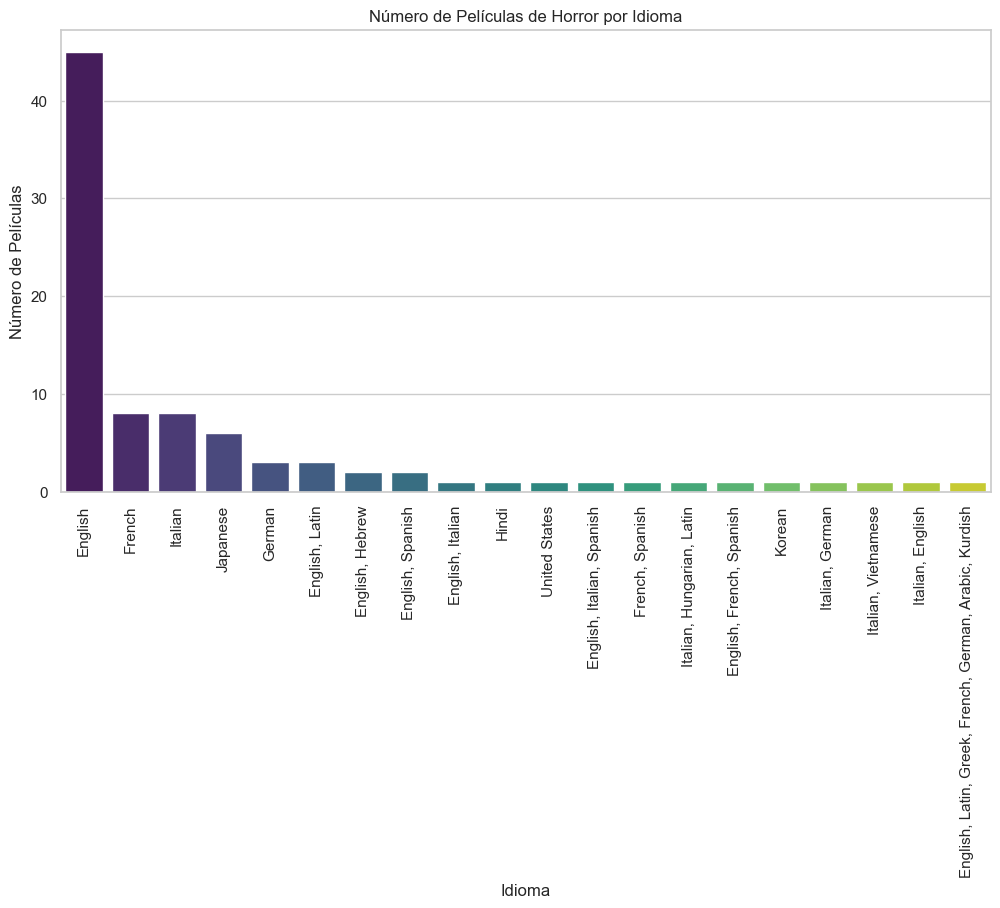

In [33]:
# Configurando el estilo de seaborn para el gráfico de barras
sns.set(style="whitegrid")

# Gráfico de barras para visualizar la cantidad de películas de horror por idioma
plt.figure(figsize=(12, 6))
sns.barplot(x=horror_language_count.index, y=horror_language_count.values, palette="viridis")
plt.title('Número de Películas de Horror por Idioma')
plt.xlabel('Idioma')
plt.ylabel('Número de Películas')
plt.xticks(rotation=90)
plt.show()


##### Creando el gráfico de pastel (pie)

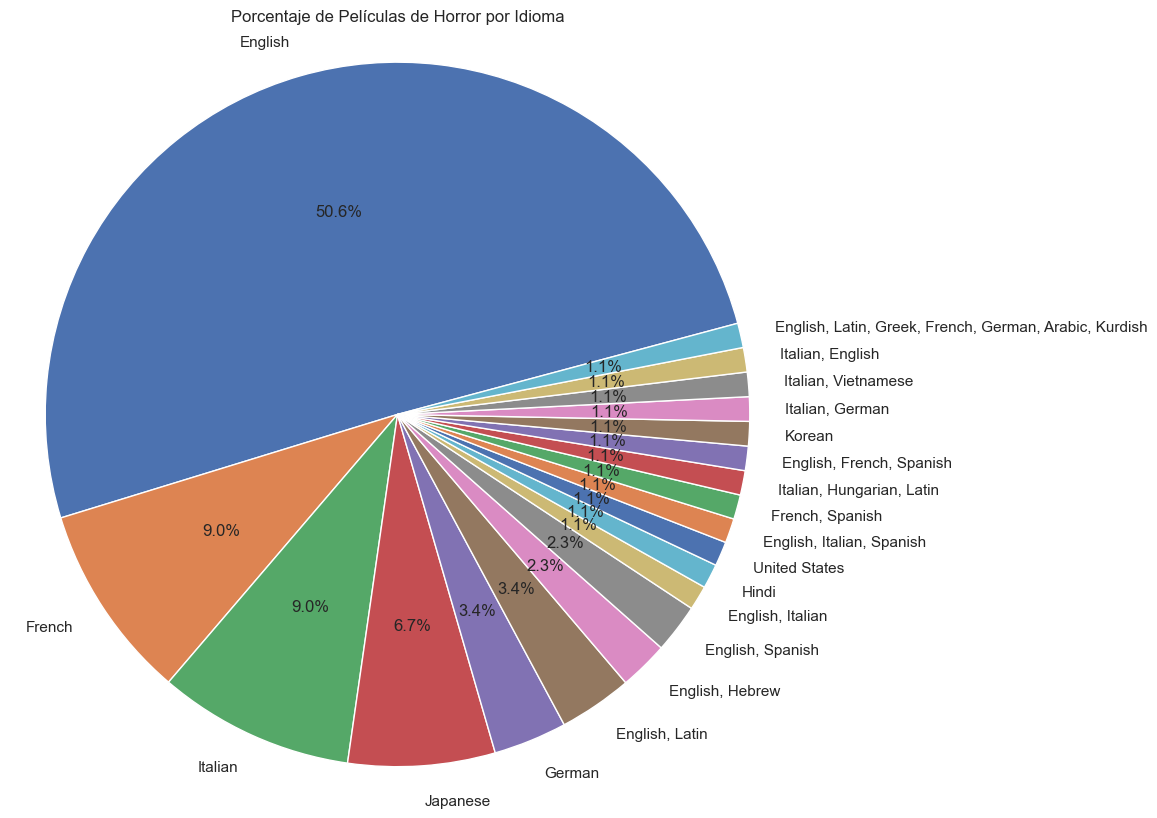

In [34]:
# Configurando el estilo de seaborn para el gráfico de pastel (pie)
sns.set(style="whitegrid")

# Gráfico de pastel para visualizar el porcentaje de películas de horror por idioma
# Utilizamos plt.pie() para crear el gráfico pastel, donde la función 'autopct='%1.1f%%'' permite mostrar el porcentaje en el gráfico
# La función startangle=15 ayuda a rotar el gráfico para obtener una mejor visualización
plt.figure(figsize=(10, 10))
plt.pie(horror_language_count_percentage, labels=horror_language_count_percentage.index, autopct='%1.1f%%', startangle=15)
plt.title('Porcentaje de Películas de Horror por Idioma')
plt.axis('equal')  # plt.axis('equal'), permite ver el gráfico como un círculo
plt.show()

#### 6.1.2. Visualización de películas del género horror clasificadas por país

##### Creando el gráfico de barras

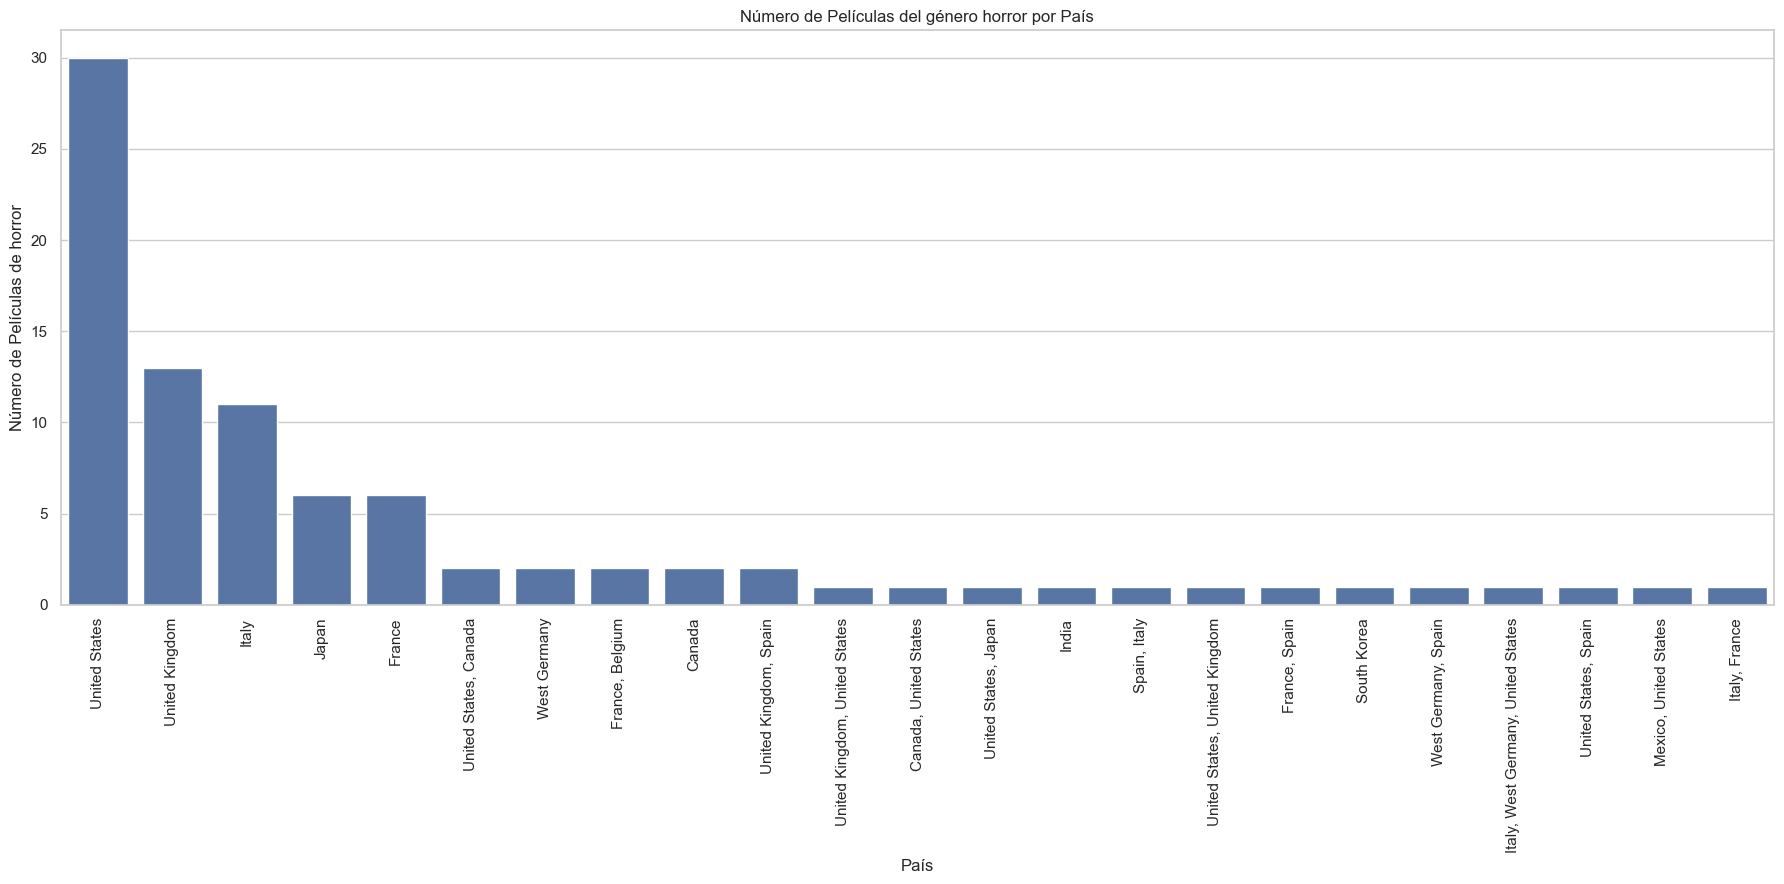

In [35]:
# Configurando el gráfico de barras 
plt.figure(figsize=(18, 9))  # Ajustar el tamaño de la figura
sns.barplot(data=horror_country, x='country', y='horror_movies_number')

# Personalizando el gráfico
plt.title('Número de Películas del género horror por País')
plt.xlabel('País')
plt.ylabel('Número de Películas de horror')
plt.xticks(rotation=90)  # Rotar los nombres de los países para mejor legibilidad

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el layout para evitar que los elementos se solapen
plt.show()

## 6.2. Visualización de datos para películas del género drama
Procedemos a crear visualizaciones para entender la relación idioma y el género drama

#### 6.2.1. Visualización de películas del género drama clasificadas por idioma

##### Creando el gráfico de barras

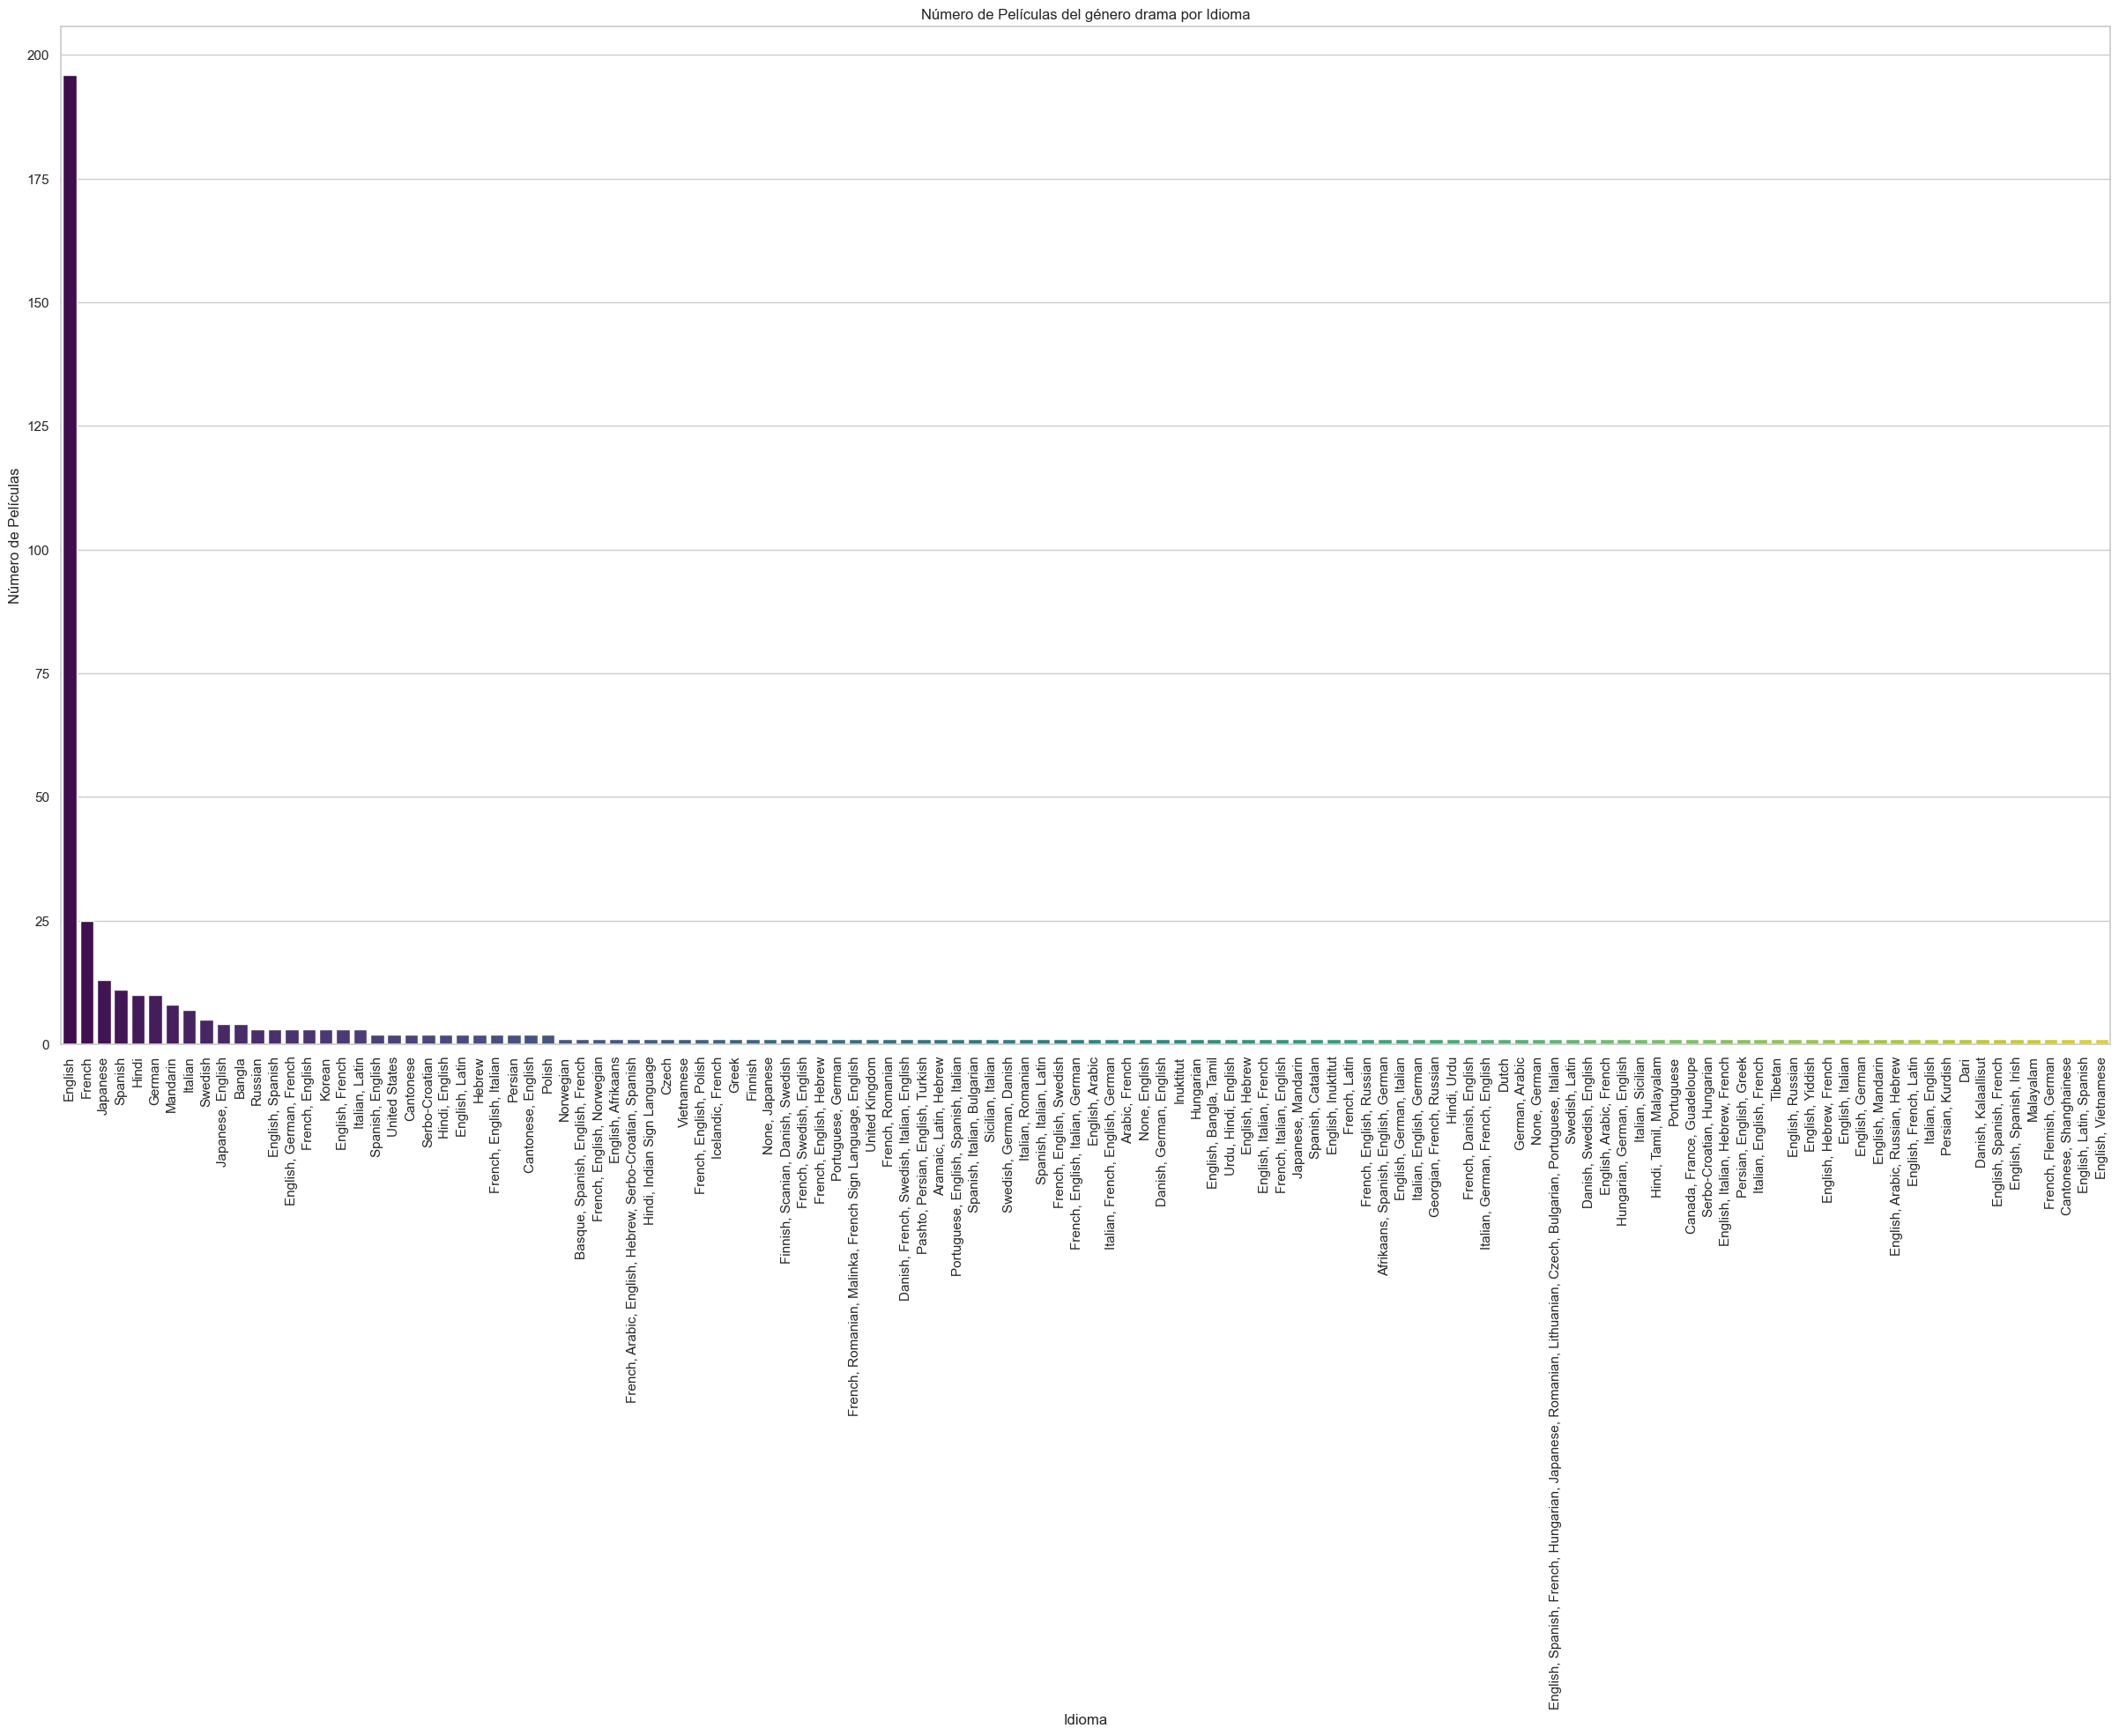

In [36]:
# Configurando el estilo de seaborn para el gráfico de barras
sns.set(style="whitegrid")

# Gráfico de barras para visualizar la cantidad de películas de género drama por idioma
plt.figure(figsize=(30, 15))
sns.barplot(x=drama_language_count.index, y=drama_language_count.values, palette="viridis")
plt.title('Número de Películas del género drama por Idioma')
plt.xlabel('Idioma')
plt.ylabel('Número de Películas')
plt.xticks(rotation=90)
plt.show()

##### Creando el gráfico de pastel (pie)

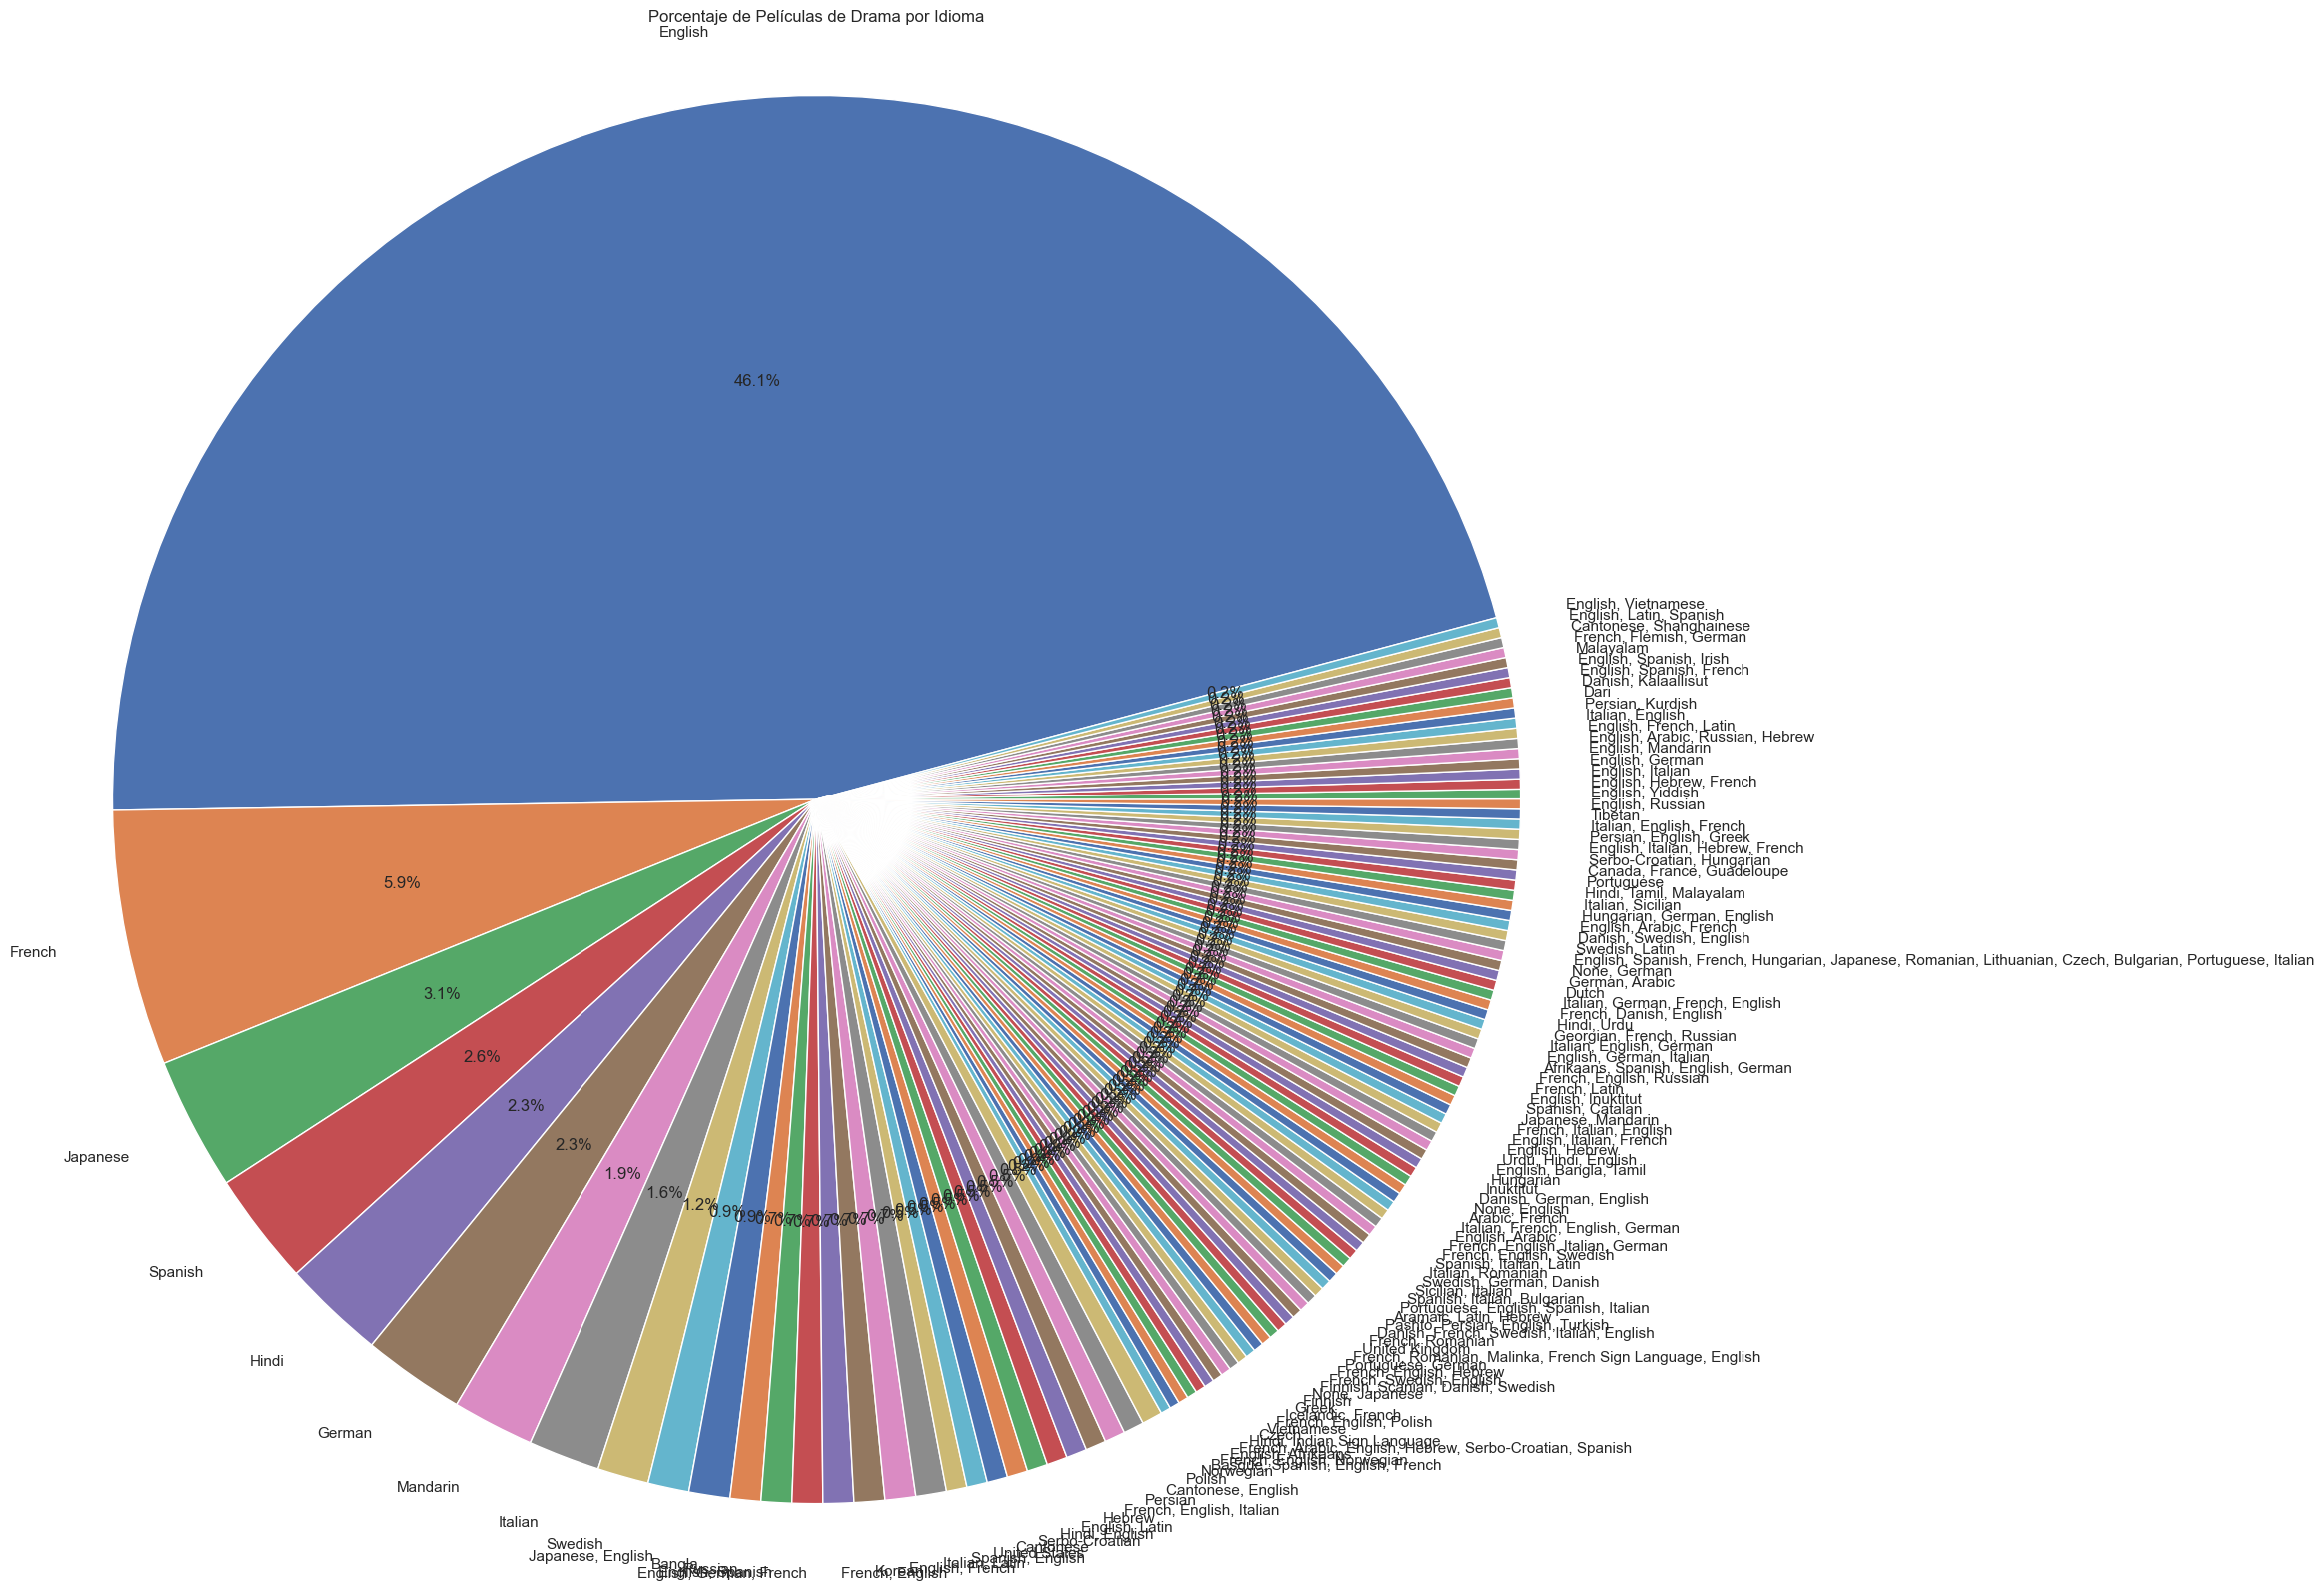

In [39]:
# Configurando el estilo de seaborn para el gráfico de pastel (pie)
sns.set(style="whitegrid")

# Gráfico de pastel para visualizar el porcentaje de películas de drama por idioma
# Utilizamos plt.pie() para crear el gráfico pastel, donde la función 'autopct='%1.1f%%'' permite mostrar el porcentaje en el gráfico
# La función startangle=15 ayuda a rotar el gráfico para obtener una mejor visualización
plt.figure(figsize=(20, 20))
plt.pie(drama_language_count_percentage, labels=drama_language_count_percentage.index, autopct='%1.1f%%', startangle=15)
plt.title('Porcentaje de Películas de Drama por Idioma')
plt.axis('equal')  # plt.axis('equal'), permite ver el gráfico como un círculo
plt.show()

#### 6.2.2. Visualización de películas del género drama clasificadas por país

##### Creando el gráfico de barras del género drama por país

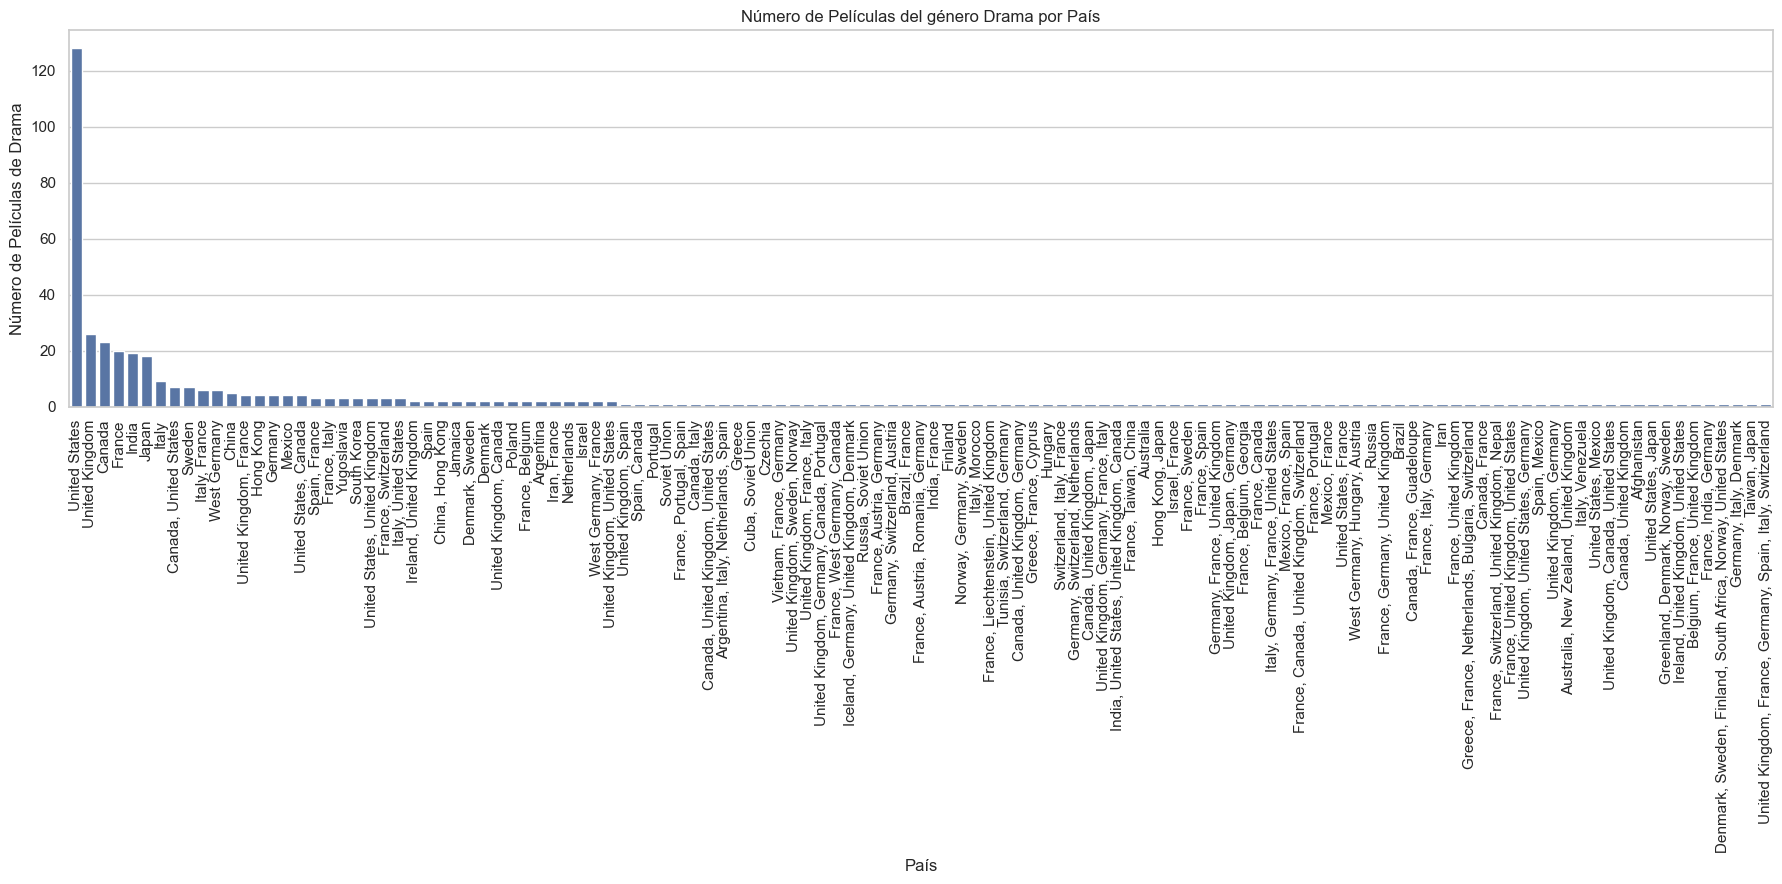

In [40]:
# Configurando el gráfico por país
plt.figure(figsize=(18, 9))  # Ajustar el tamaño de la figura
sns.barplot(data=drama_country, x='country', y='drama_movies_number')

# Personalizando el gráfico
plt.title('Número de Películas del género Drama por País')
plt.xlabel('País')
plt.ylabel('Número de Películas de Drama')
plt.xticks(rotation=90)  # Rotar los nombres de los países para mejor legibilidad

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el layout para evitar que los elementos se solapen
plt.show()

##### Creando el gráfico de pastel (pie) del género drama por país

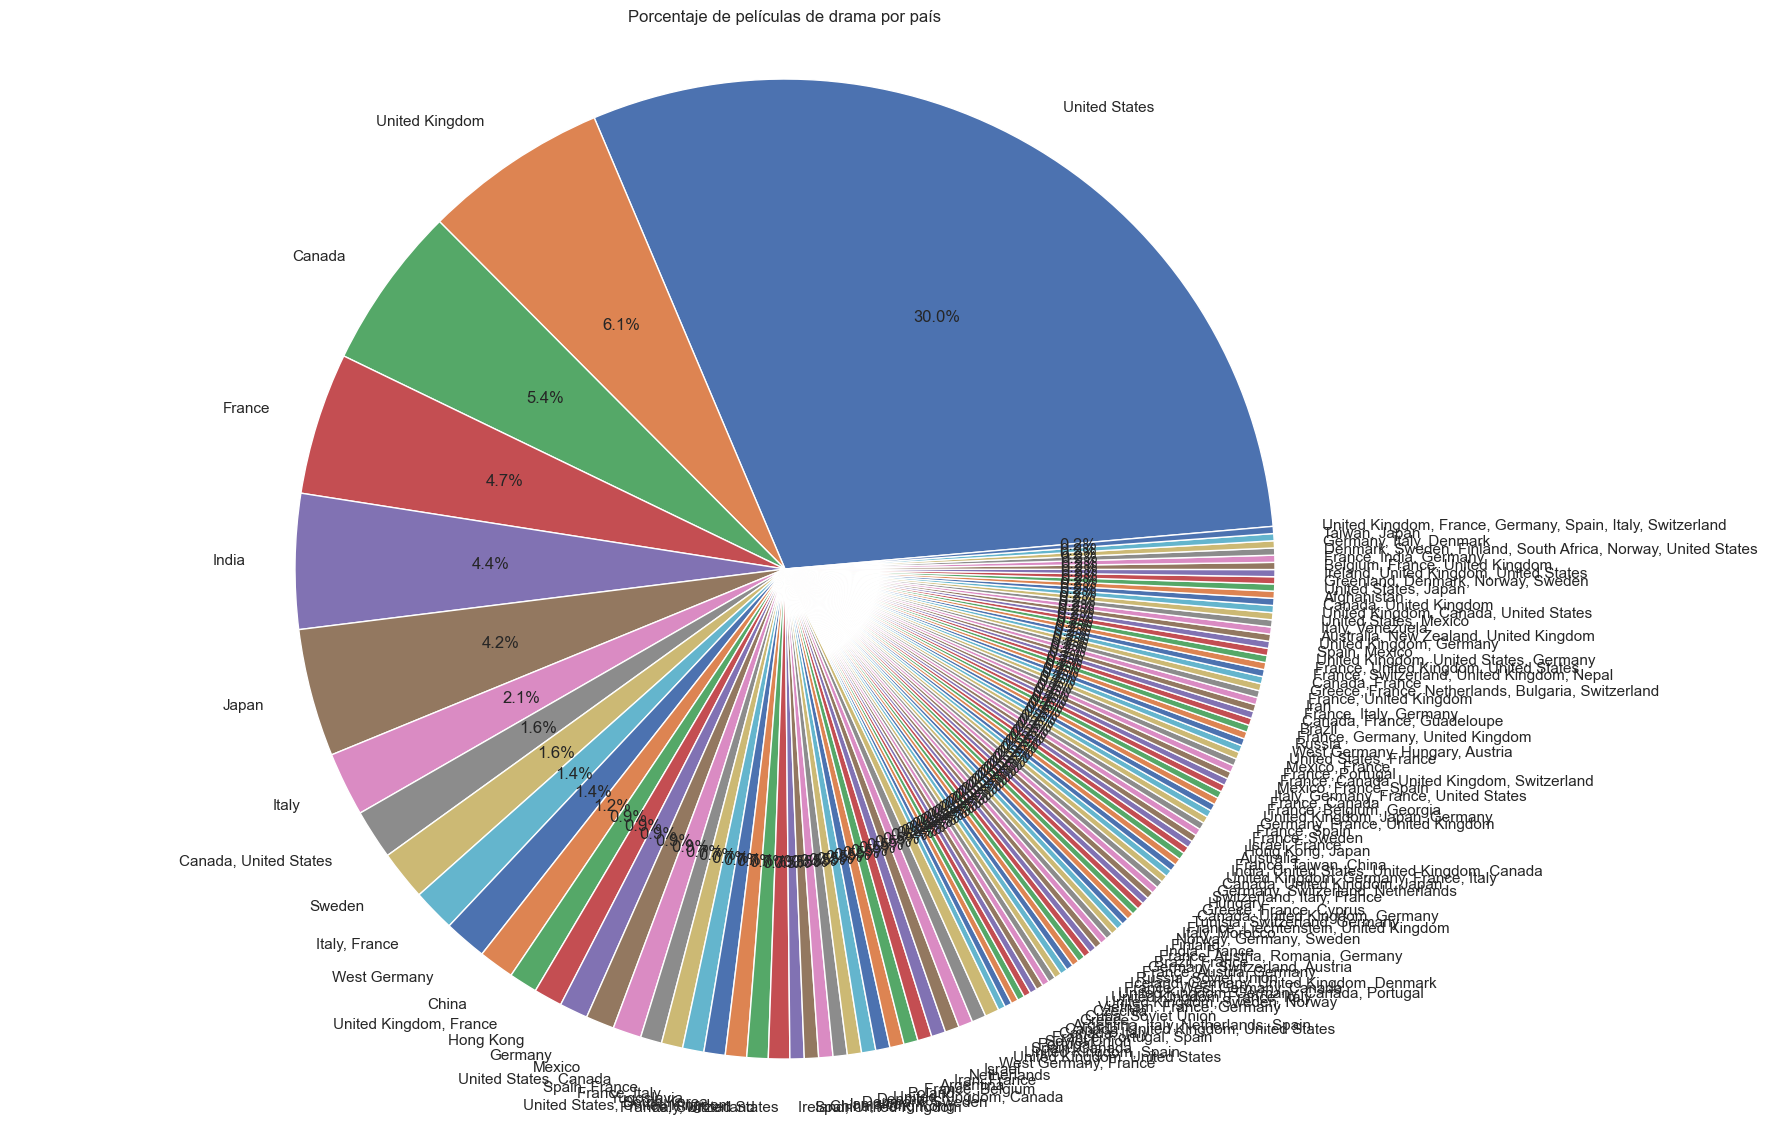

In [41]:
# Calculando los porcentajes
total_drama_movies = drama_country['drama_movies_number'].sum()
drama_country['percentage'] = (drama_country['drama_movies_number'] / total_drama_movies) * 100

# Mostrando el DataFrame con los porcentajes
# print(drama_country)

# Creando el gráfico circular (pie chart)
plt.figure(figsize=(20, 14))
plt.pie(drama_country['percentage'], labels=drama_country['country'], autopct='%1.1f%%', startangle=5)
plt.title('Porcentaje de películas de drama por país')
plt.axis('equal')  # Para que el gráfico sea un círculo
plt.show()

# 7. Primeras Conclusiones y Reflexiones

Finalmente, al analizar los resultados de las visualizaciones y los análisis, reflexiona sobre la hipótesis inicial:

-  ¿Se observa una clara tendencia sobre el idioma en el género horror?

    El análisis muestra cómo el idioma utilizado en las películas del género de horror muestra patrones o caracteríticas especificas, lo cual se refiere a varios aspectos como:
    - **Uso del lenguaje**: Se observando que el idioma inglés es el tipo de lenguaje o vocabulario que se utiliza más comúnmente en las películas de horror (50.6%), es posible que existan palabras en este idioma que evocan miedo o tensión.
    - **Preferencias lingüísticas**: Podría decirse que hay un predominio de ciertas lenguas en la producción de películas de horror, como si las historias de horror son más populares en un idioma específico en comparación con otros. Podemos observar que después del idioma inglés, los idiomas prevalentes son el francés y el italiano ambos con un 9%, y a continuación el idioma japones con un 6.7%.
    - **Estilo narrativo**: Podría implicar que se está analizando cómo el estilo narrativo puede variar dependiendo del idioma, lo cual puede influir en la forma en que se percibe el miedo o la tensión.
    - **Impacto cultural**: También podría estar relacionado con cómo las diferencias culturales, que son reflejadas en el idioma, afectan la forma en que se cuenta una historia de horror y cómo son recibidas por el público.

-  ¿Qué idiomas son más prevalentes en el género horror?
 
    Según nuestro análisis los idiomas más comunes o utilizados en las obras cinematográficas que pertenecen al género del horror son realizadas en inglés (50.6%), seguida del francés y el italiano ambos con un 9%, y a continuación el idioma japones con un 6.7%. Esto incluye películas y serie de televisión en este género. Por lo que se determina que hay un escaso de número de películas de horror en idioma español.

- ¿Existen otros géneros que también muestren tendencias similares o diferentes? 

    El otro género análizado fue el de drama. Este gnéro también tiene una 
    Se llevó a cabo un análisis exhaustivo del género dramático en el cine, revelando que el idioma predominante en las obras cinematográficas es el inglés, con un notable 46.1% de las producciones. Le siguen el francés, que representa el 5.9%, el japonés con un 3.1% y el español, que apenas alcanza el 2.6%. Es significativo señalar que un número considerable de países se sitúa en torno al 1% en cuanto a la producción de dramas.

    Al desglosar estos datos por país, se observa que los países de habla inglesa dominan el panorama cinematográfico. Estados Unidos encabeza la lista con un impresionante 30.0%, seguido por Inglaterra con un 6.1% y Canadá con un 5.4%. Francia ocupa el cuarto lugar con un 4.7%, mientras que India y Japón presentan cifras similares, con un 4.4% y un 4.2%, respectivamente. Italia se encuentra en el séptimo puesto con un 2.1%. El resto de los países analizados se sitúan por debajo del 1.6%, lo que pone de manifiesto la limitada producción de películas dramáticas en español.

# 8. Análisis EXTRA: Análisis estadísticos más profundos

Con el objetivo de llevar a cabo un análisis estadístico más exhaustivo sobre las películas de los géneros horror y drama, así como para validar la hipótesis formulada, nos disponemos a seguir una serie de pasos metódicos. 

En este apartado, se presentará un análisis descriptivo detallado y se aplicarán pruebas estadísticas rigurosas, como la prueba Chi-Cuadrado, para evaluar las relaciones y patrones dentro de los datos. En este análisis estadístico se incluirán otras variables relevantes, tales como, idioma, género, país, rating y votos.

### 8.1. Limpieza de datos
En esta fase, llevaremos a cabo un proceso exhaustivo de limpieza de datos, centrándonos particularmente en las nuevas columnas agregadas year, rating y vote. Nuestro objetivo es garantizar la integridad y la calidad de la información, eliminando entradas erróneas, duplicados y valores atípicos. Esto nos permitirá obtener un conjunto de datos más preciso y confiable, lo cual es fundamental para el análisis posterior.

In [42]:
# Cargando el dataset
df_imdb_2 = pd.read_csv('../data/df_imdb_cleaned.csv')

# Filtrando las filas donde 'kind' es 'movie' y 'genre' es 'horror' o 'drama'
df_filter_genre = df_imdb_2[
    (df_imdb_2['kind'] == 'movie') & 
    (df_imdb_2['genre'].str.lower().isin(['horror', 'drama']))
]

# Seleccionando las columnas deseadas. Incluye rating, y vote. Hemos incluído también la columna year para realizar unas operaciones más adelante
new_df = df_filter_genre[['titleId', 'title', 'year', 'kind', 'genre', 'rating', 'vote', 'country', 'language']]

In [43]:
# Mostrando el número de valores nulos en cada columna
null_values = new_df.isnull().sum()
null_values

# Utilizamos el método '.fillna()' para reemplazar los valores nulos de la columna 'language' con el valor correspondiente de la columna 'country' en la misma fila.
new_df.language = new_df.language.fillna(new_df.country)

# Utilizamos el método '.fillna()' para reemplazar los valores nulos de la columna 'country' con el valor correspondiente de la columna 'language' en la misma fila.
new_df.country = new_df.country.fillna(new_df.language)

# Utilizamos el método '.fillna()' para reemplazar los valores nulos de la columna 'country' con el valor correspondiente de la columna 'language' en la misma fila.
new_df.country = new_df.country.fillna(new_df.language)

# Mostrando los nulos
print (new_df.isna().sum())

# Mostrando el porcentaje de valores nulos 
print(new_df.isnull().mean())


titleId     0
title       0
year        0
kind        0
genre       0
rating      7
vote        7
country     0
language    0
dtype: int64
titleId     0.000000
title       0.000000
year        0.000000
kind        0.000000
genre       0.000000
rating      0.016588
vote        0.016588
country     0.000000
language    0.000000
dtype: float64


In [44]:
# Deshaciéndonos filas con nulos
df_dataframe = new_df.dropna()
print(f"Filas después de eliminar nulos: {new_df.shape[0]}")

df_dataframe.isnull().mean()

Filas después de eliminar nulos: 422


titleId     0.0
title       0.0
year        0.0
kind        0.0
genre       0.0
rating      0.0
vote        0.0
country     0.0
language    0.0
dtype: float64

In [45]:
df_dataframe.head()

titleId               title    year   kind   genre  rating    vote  \
28        28  The Spitfire Grill  1996.0  movie   Drama     7.0  6850.0   
58        58       Notre musique  2004.0  movie   Drama     6.9  2915.0   
81        81       Demon Warrior  1988.0  movie  Horror     4.0   140.0   
109      109            Querelle  1982.0  movie   Drama     6.7  6270.0   
111      111      The Neon Bible  1995.0  movie   Drama     6.1   831.0   

                   country                                           language  
28           United States                                            English  
58     France, Switzerland  French, Arabic, English, Hebrew, Serbo-Croatia...  
81           United States                                            English  
109   West Germany, France                                            English  
111  United Kingdom, Spain                                            English

### 8.2. Análisis descriptivo con las columnas rating y vote
Segundo, realizaremos un análisis descriptivo de las columnas rating y vote para entender cómo estos factores podrían influir en la percepción de los géneros de las películas según nuestra hipótesis planteada al inicio.

El método describe() proporcionará estadísticas como la media, la mediana, el mínimo, el máximo y los cuartiles, que nos ayudarán a entender la distribución de los ratings y votos de las películas.

In [46]:
# Realizando un análisis descriptivo de 'rating' y 'vote'
descriptive_columns = df_dataframe[['rating', 'vote']].describe()

print("Descripción del Rating:\n", descriptive_columns)


Descripción del Rating:
            rating          vote
count  415.000000  4.150000e+02
mean     6.524096  2.920186e+04
std      1.238765  1.827114e+05
min      1.900000  7.000000e+00
25%      5.900000  6.645000e+02
50%      6.700000  2.884000e+03
75%      7.400000  8.846500e+03
max      9.300000  2.462087e+06


### 8.3. Comparaciones entre las cantidades de películas de Horror y Drama por idioma y país
Vamos a comparar la cantidad de películas en los géneros de Horror y Drama por idioma y país. Es decir, contaremos cuántas películas se produjeron cada año y las graficamos para observar tendencias a lo largo del tiempo.

- Utilizamos groupby() para agrupar por language y genre, y luego contamos las películas en cada grupo. 
- Al agrupar por ['country', 'language', 'genre'], se obtiene un conteo más detallado que permite ver la cantidad de películas de cada género en cada combinación de país e idioma.
- Utilizamos unstack(fill_value=0) permite que las filas que no tienen datos se rellenen con ceros, lo que facilita la visualización de datos.

El resultado se presenta en una tabla donde se pueden comparar las cantidades.

In [47]:
# Filtrando las películas de Horror y Drama
genres_interested = df_dataframe[df_dataframe['genre'].isin(['Horror', 'Drama'])]

# Contando el número de películas por idioma y género
genre_counts = genres_interested.groupby(['country', 'language', 'genre']).size().unstack(fill_value=0)
genre_counts


genre                                                              Drama  \
country                                language                            
Argentina                              Spanish                         1   
                                       Spanish, Italian, Latin         1   
Argentina, Italy, Netherlands, Spain   Spanish                         1   
Australia                              English                         1   
Australia, New Zealand, United Kingdom English                         1   
...                                                                  ...   
West Germany, France                   English                         1   
                                       German                          1   
West Germany, Hungary, Austria         Hungarian, German, English      1   
West Germany, Spain                    German                          0   
Yugoslavia                             Serbo-Croatian, Hungarian       1   

genre                                                              Horror  
country                                language                            
Argentina                              Spanish                          0  
                                       Spanish, Italian, Latin          0  
Argentina, Italy, Netherlands, Spain   Spanish                          0  
Australia                              English                          0  
Australia, New Zealand, United Kingdom English                          0  
...                                                                   ...  
West Germany, France                   English                          0  
                                       German                           0  
West Germany, Hungary, Austria         Hungarian, German, English       0  
West Germany, Spain                    German                           1  
Yugoslavia                             Serbo-Croatian, Hungarian        0  

[199 rows x 2 columns]

### 8.4. Análisis de tendencias en el tiempo
Si el conjunto de datos dispone de una cantidad suficiente de información temporal, podemos examinar la evolución de la producción de películas a través de los años.

- Realizaremos un conteo del número de películas producidas cada año y graficaremos estos datos para identificar las tendencias a lo largo del tiempo

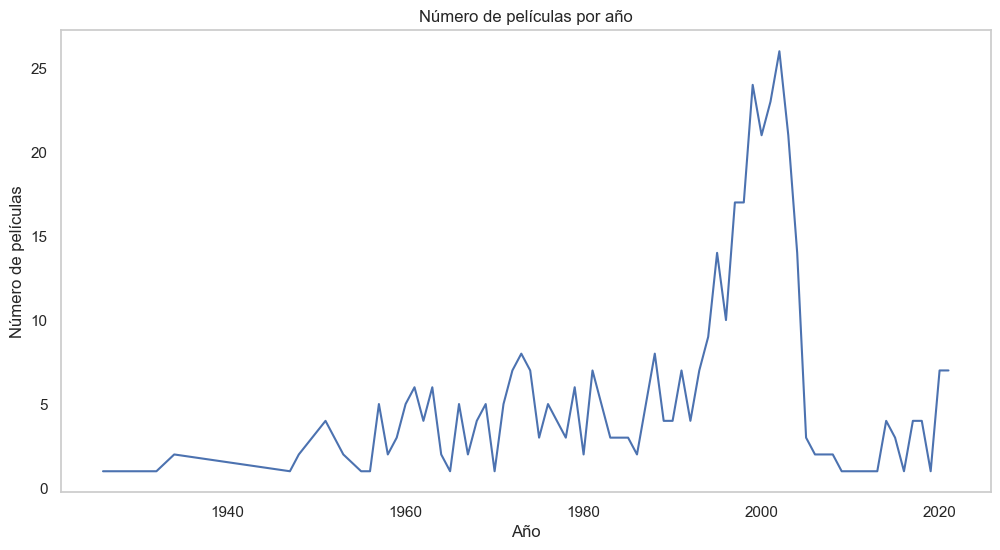

In [48]:
# Contamos el número de películas por año
movies_per_year = df_dataframe['year'].value_counts().sort_index()

# Graficar la tendencia
plt.figure(figsize=(12, 6))
movies_per_year.plot(kind='line')
plt.title('Número de películas por año')
plt.xlabel('Año')
plt.ylabel('Número de películas')
plt.grid()
plt.show()

### 8.5. Visualización de la distribución de películas por idioma y país
Podemos utilizar gráficos de barras y gráficos de pastel para visualizar la distribución de películas por idioma y país.
- Utilizamos countplot() para visualizar la cantidad de películas por idioma y un gráfico de pastel para ilustrar la proporción de películas por país

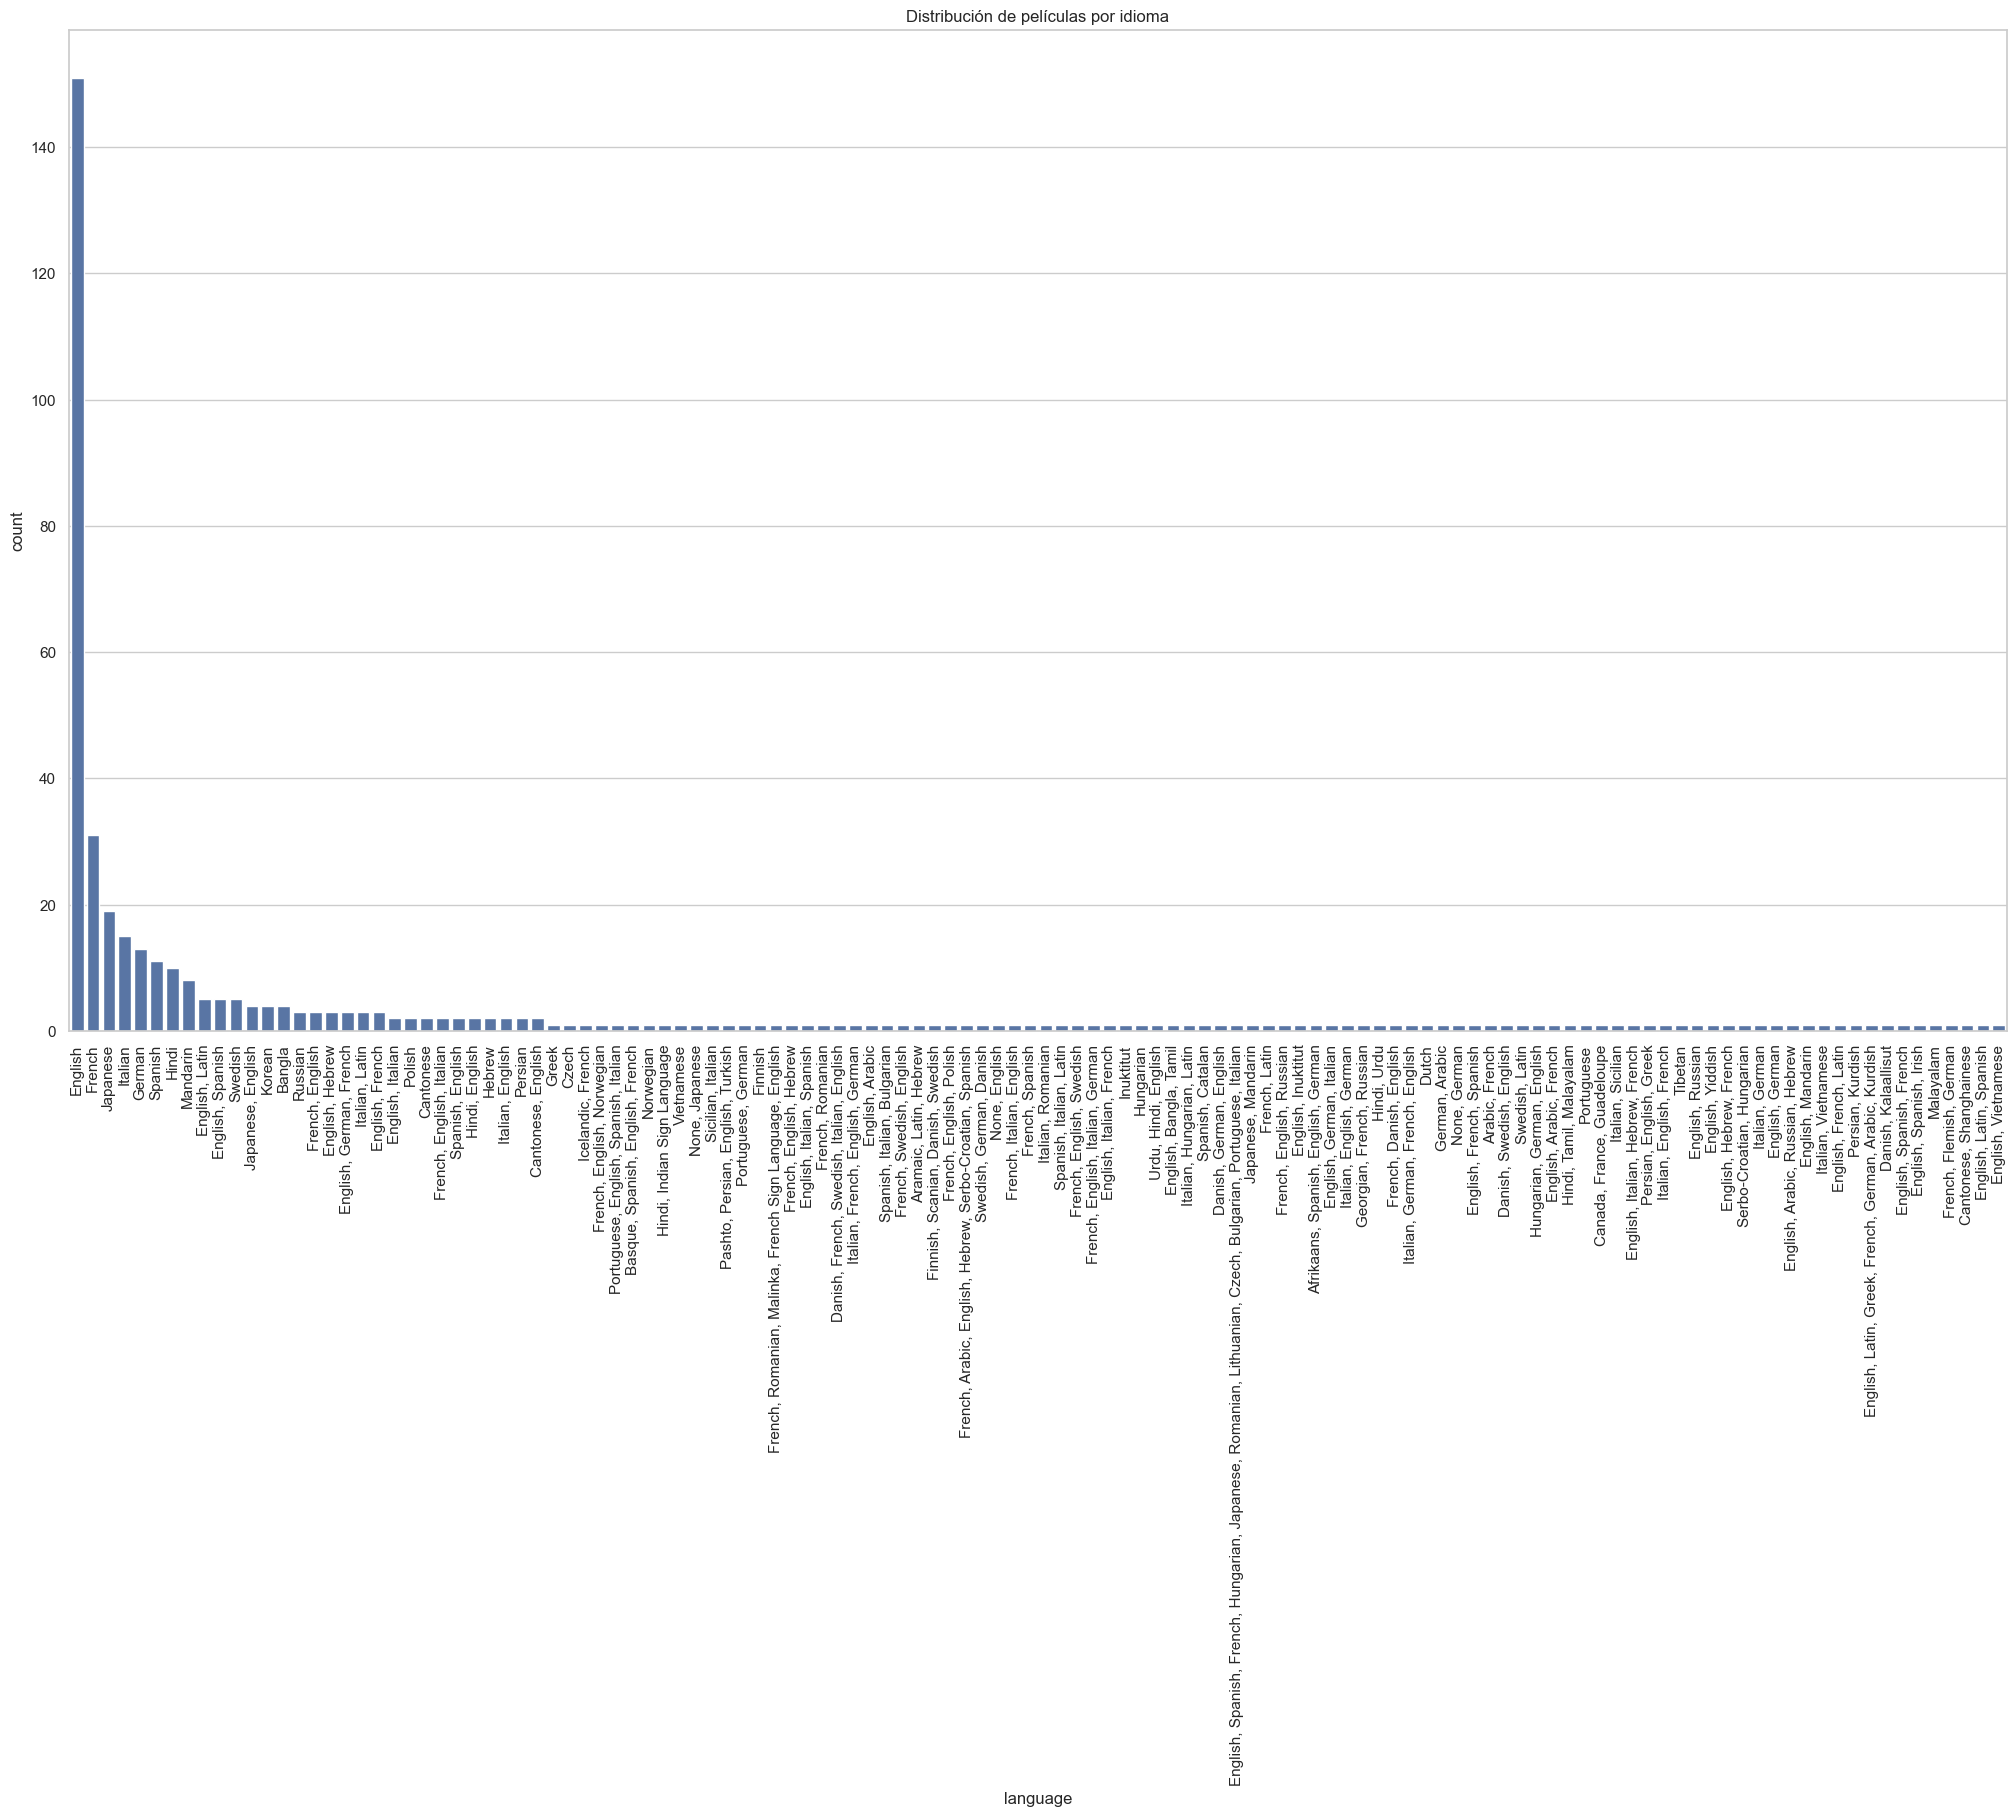

In [49]:
# Gráfico de barras para la distribución de películas por idioma
plt.figure(figsize=(25, 13))
sns.countplot(data=df_dataframe, x='language', order=df_dataframe['language'].value_counts().index)
plt.title('Distribución de películas por idioma')
plt.xticks(rotation=90)
plt.show()

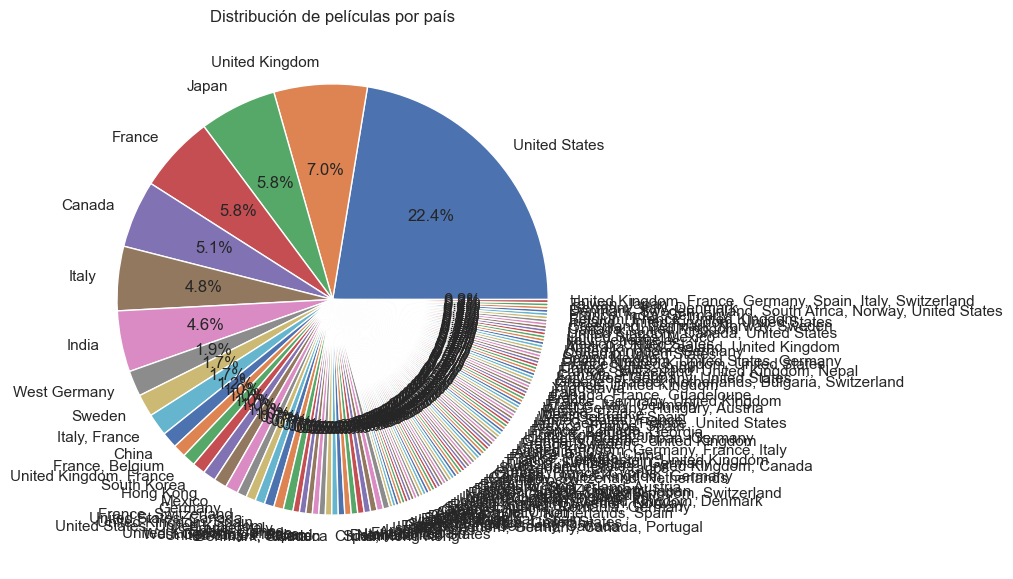

In [50]:
# Gráfico de pastel para la distribución de películas por país
country_counts = df_dataframe['country'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%')
plt.title('Distribución de películas por país')
plt.show()

### 8.6. Pruebas estadísticas para validar la hipótesis
#### 8.6.1 Prueba Chi-Cuadrado
Para abordar la hipótesis planteada sobre la influencia del idioma en la clasificación dentro del género cinematográfico, especialmente en el cine de terror en el contexto hispanohablante, es importante realizar un análisis estadístico que incluya las variables relevantes: idioma, género, país, rating y votos.

In [52]:
import pandas as pd
from scipy.stats import chi2_contingency

# Filtramos el DataFrame para incluir solo las películas del género de terror
df_horror = df_dataframe[df_dataframe['genre'].str.contains('Horror', case=False)]

# Crear una tabla de contingencia para el idioma y el país
contingency_table_language_country = pd.crosstab(df_horror['language'], df_horror['country'])
chi2_language_country, p_language_country, dof_language_country, expected_language_country = chi2_contingency(contingency_table_language_country)

print(f"Chi-cuadrado (Idioma y País): {chi2_language_country}, p-valor: {p_language_country}")

# Crear una tabla de contingencia para el idioma y el rating
# Es recomendable categorizar el rating en grupos, por ejemplo:
df_horror['rating_category'] = pd.cut(df_horror['rating'], bins=[0, 4, 6, 8, 10], labels=['Bajo', 'Medio', 'Alto', 'Excelente'])

contingency_table_language_rating = pd.crosstab(df_horror['language'], df_horror['rating_category'])
chi2_language_rating, p_language_rating, dof_language_rating, expected_language_rating = chi2_contingency(contingency_table_language_rating)

print(f"Chi-cuadrado (Idioma y Rating): {chi2_language_rating}, p-valor: {p_language_rating}")

# Crear una tabla de contingencia para el idioma y el número de votos
# Podrías categorizar el número de votos en grupos si es necesario
df_horror['vote_category'] = pd.cut(df_horror['vote'], bins=[0, 100, 1000, 10000, 100000], labels=['Muy Bajo', 'Bajo', 'Medio', 'Alto'])

contingency_table_language_vote = pd.crosstab(df_horror['language'], df_horror['vote_category'])
chi2_language_vote, p_language_vote, dof_language_vote, expected_language_vote = chi2_contingency(contingency_table_language_vote)

print(f"Chi-cuadrado (Idioma y Votos): {chi2_language_vote}, p-valor: {p_language_vote}")


Chi-cuadrado (Idioma y País): 896.4592027972028, p-valor: 4.1950666265089484e-44
Chi-cuadrado (Idioma y Rating): 47.20042789001123, p-valor: 0.10020303142895064
Chi-cuadrado (Idioma y Votos): 38.90116959064328, p-valor: 0.8226640553271297


### 8.7. Conclusiones y reflexiones del análisis Extra
Se realizó un análisis estadístico utilizando la prueba Chi-Cuadrado para evaluar la influencia del idioma en la clasificación de películas de terror en el contexto hispanohablante, considerando variables como idioma, género, país, rating y votos.
- Filtrado de Datos: Se filtraron las películas del género "Horror" en el DataFrame.
- Análisis Chi-Cuadrado:
    - Idioma y País: Se construyó una tabla de contingencia y se calculó el Chi-Cuadrado, obteniendo un valor de 896.46 con un p-valor de 4.19e-44, lo que indica una relación significativa entre el idioma y el país.
    - Idioma y Rating: Se categorizó el rating en grupos, resultando en un Chi-Cuadrado de 47.20 y un p-valor de 0.10, sugiriendo que no hay una relación significativa.
    - Idioma y Votos: Se categorizó el número de votos, obteniendo un Chi-Cuadrado de 38.90 y un p-valor de 0.82, lo que también indica una falta de relación significativa.

Resultados finales Chi-Cuadrado:
- Idioma y País: Relación significativa.
- Idioma y Rating: No significativo.
- Idioma y Votos: No significativo.


# 9. CONCLUSIONES GENERALES
Hemos compilado estos hallazgos en reportes que incluyen gráficos y análisis realizados, así como mis conclusiones sobre la influencia del idioma en el género cinematográfico de horror y drama.

Con los resultados, hemos realizado un análisis más profundos, como pruebas estadísticas para validar la hipótesis.
En las pruebas estadísticas se abordó la hipótesis planteada sobre la influencia del idioma en la clasificación dentro del género cinematográfico, especialmente en el cine de terror en el contexto hispanohablante, en este análisis estadístico se incluyeron las variables relevantes: idioma, género, país, rating y votos.

Chi-cuadrado:
- Idioma y País: Existe una fuerte asociación.
- Idioma y Rating: No hay suficiente evidencia para afirmar que existe una asociación significativa.
- Idioma y Votos: No hay suficiente evidencia para afirmar que existe una asociación significativa.

En conclusión, la hipótesis inicial se ve respaldada en cuanto a la influencia del idioma en la producción de películas de horror, especialmente en relación con el país de origen. Sin embargo, no se encontraron evidencias suficientes para afirmar que el idioma afecta significativamente la recepción en términos de ratings o votos en el género de terror en el cine hispanohablante. Esto sugiere que, aunque el idioma puede ser un factor determinante en la producción y la percepción cultural del horror, hay otros elementos que también juegan un papel importante en la recepción del género.